## EXERCISE: Decision trees



Let's try a decision tree on Iris data.

### Train and view a tree

In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris

iris = load_iris()
# print(iris.DESCR)
print(iris.feature_names)
key=', '.join(['{}={}'.format(i,name) for i,name in enumerate(iris.target_names)])
print(key)

# First let's create a train and test split
X_train, X_test, Y_train, Y_test = train_test_split(iris.data, iris.target, test_size=0.33,
                                                    random_state=5) # so we get the same results

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
0=setosa, 1=versicolor, 2=virginica


In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Let's fit a model
tree_model = DecisionTreeClassifier(max_depth=2, criterion='entropy')
tree_model.fit(X_train, Y_train)

# Evaluate
print('Classification report ({}):\n'.format(key))
print(classification_report(Y_test, tree_model.predict(X_test)))

Classification report (0=setosa, 1=versicolor, 2=virginica):

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.89      0.94      0.91        17
           2       0.94      0.88      0.91        17

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



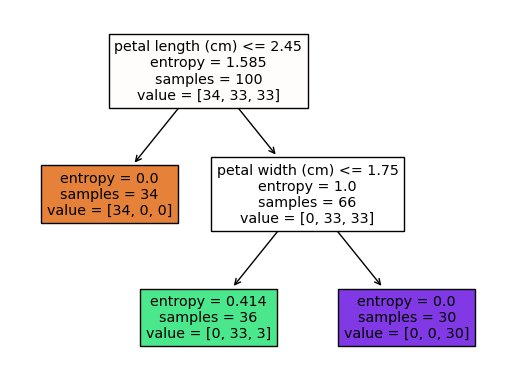

In [3]:
from sklearn import tree
import matplotlib.pyplot as plt
tree.plot_tree(tree_model, feature_names=iris.feature_names, filled=True)
print('Decision tree:\n')
plt.show()

## EXERCISE: Model selection on test data





### McNemar's test

McNemar's test is [recommended when we have a single test split](http://sci2s.ugr.es/keel/pdf/algorithm/articulo/dietterich1998.pdf).

Under H0, the two algorithms should have the same error rate.

In [4]:
from scipy.stats import chi2

def mcnemar(x, y):
    n1 = np.sum(x < y)
    n2 = np.sum(x > y)
    stat = (np.abs(n1-n2)-1)**2 / (n1+n2)
    pval = chi2.sf(stat,1)
    return stat, pval

### TODO Compare classifiers

- Choose the decision tree max_depth in [2..6], criterion in ['entropy', 'gini'] and splitter in ['best', 'random']. What are the best parameters? Print out all grid scores to sanity check the selection. Is there a unique best set of parameters?
- Use `np.array` create `l_yn` and `t_yn` arrays showing respectively for logistic regression and decision tree whether each test instance is predicted correctly (`1`) or incorrectly (`0`). Are the classifiers significantly different at p<=0.05 according to McNemar's test?(use the logistic regression code from previous week)
- Which classifier is significantly better at p<=0.05 using paired t-test?(use accuracy measure)

In [5]:
# TODO: replace the content of this cell with your solution
# raise NotImplementedError

from sklearn.model_selection import GridSearchCV

para = [
    {'max_depth': [2,3,4,5,6], 
     'criterion': ['entropy', 'gini'], 
     'splitter': ['best', 'random']
    }
]

tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, para, cv = 10, scoring='accuracy')
clf.fit(X_train, Y_train)
print('Best Para for accuracy', clf.best_params_)
print(classification_report(Y_test, clf.predict(X_test)))

Best Para for accuracy {'criterion': 'entropy', 'max_depth': 4, 'splitter': 'random'}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       0.94      0.88      0.91        17
           2       0.89      0.94      0.91        17

    accuracy                           0.94        50
   macro avg       0.94      0.94      0.94        50
weighted avg       0.94      0.94      0.94        50



In [6]:
# TODO: replace the content of this cell with your solution
# raise NotImplementedError

# compare logistic regression and decision tree
# output prediction based on two algorithms
# output the p value using Mcnemar test

# fit logistic regression 
from sklearn.linear_model import LogisticRegression
logit = LogisticRegression()
logit.fit(X_train, Y_train)
l_pred = logit.predict(X_test)
l_yn = [int(p==t) for p,t in zip(l_pred, Y_test)]

# fit tree
tree = DecisionTreeClassifier()
tree.fit(X_train, Y_train)
t_pred = tree.predict(X_test)
t_yn = [int(p==t) for p,t in zip(t_pred, Y_test)]

stat, pval = mcnemar(l_yn, t_yn)

print('l_yn:', l_yn)
print('t_yn:', t_yn)

print('P value is', pval)
print('stat', stat)

l_yn: [1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
t_yn: [1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
P value is 1.0
stat 0.0


In [7]:
# TODO: replace the content of this cell with your solution
# raise NotImplementedError

from sklearn.model_selection import cross_val_score

logit = LogisticRegression(max_iter = 500,random_state=0)
l_scores = cross_val_score(logit, iris.data, iris.target, cv=10, scoring='accuracy')
print(l_scores)

tree = DecisionTreeClassifier(random_state=0)
t_scores = cross_val_score(tree, iris.data, iris.target, cv=10, scoring='accuracy')
print(t_scores)

import scipy.stats as stats
print(stats.ttest_rel(l_scores, t_scores))

[1.         0.93333333 1.         1.         0.93333333 0.93333333
 0.93333333 1.         1.         1.        ]
[1.         0.93333333 1.         0.93333333 0.93333333 0.86666667
 0.93333333 1.         1.         1.        ]
TtestResult(statistic=1.5, pvalue=0.16785065605707486, df=9)


# From data to decisions


## EXERCISE: Ensembling classifiers

### Load and split data

scikit-learn provides a `train_test_split` function (in `sklearn.cross_validation`). However, there is no function to do a three-way split into training, development and held-out test data.

Let's create a three-way 50/25/25 train/dev/test split by using `train_test_split` two times.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_digits

# load digits data
digits = load_digits()
print(digits.DESCR)
X_td, X_test, y_td, y_test = train_test_split(digits.data, digits.target, test_size=0.25,
                                              random_state=5) # so we get the same results
X_train, X_dev, y_train, y_dev = train_test_split(X_td, y_td, test_size=0.33,
                                                  random_state=5) # so we get the same results

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Plot error vs complexity for decision tree

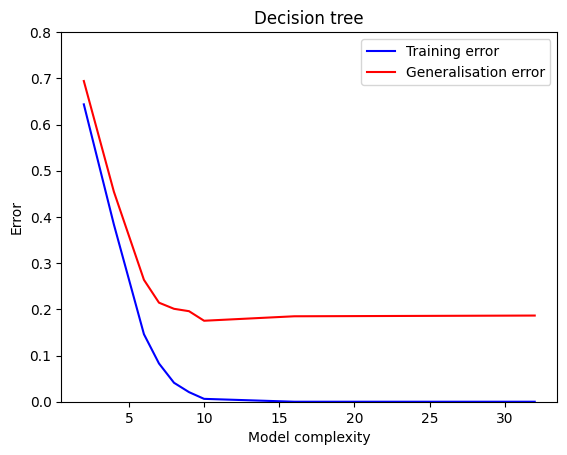

In [9]:
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import random

NUM_SAMPLES = 10
NUM_TRAIN_SETS = 10

def subsample(X, y, sample_size):
    xy_tuples = list(zip(X, y))
    xy_sample = [random.choice(xy_tuples) for _ in range(sample_size)]
    X_sample, y_sample = zip(*xy_sample)
    return X_sample, y_sample

def error(clf, X, y):
    "Calculate error as 1 - accuracy"
    return 1-clf.score(X,y)

def bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size, num_samples=NUM_SAMPLES):
    train_errors = []
    test_errors = []
    for _ in range(num_samples):
        X_sample, y_sample = subsample(X_train, y_train, sample_size)
        clf.fit(X_sample, y_sample)
        train_errors.append(error(clf,X_sample,y_sample))
        test_errors.append(error(clf,X_test,y_test))
    train_error = sum(train_errors)/len(train_errors)
    test_error = sum(test_errors)/len(test_errors)
    return train_error, test_error

complexities = []
train_errors = []
test_errors = []
for max_depth in [2,4,6,7,8,9,10,16,32]:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(max_depth)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,0.8)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Decision tree')
plt.legend()
plt.show()

### TODO Assessing decision tree fit

- Does training or generalisation error level out first? Why?
- What is the best value of max_depth based on this plot?
- Why doesn't generalisation error increase on the right

Generalisation error level out first. This is due to tree keep training util training error goes to zero

8 or 9 will be the best

decision tree has some mechinisms for overfitting and for different model overfitting would has different levels of harm on unseen data

### Plot error vs complexity for random forest

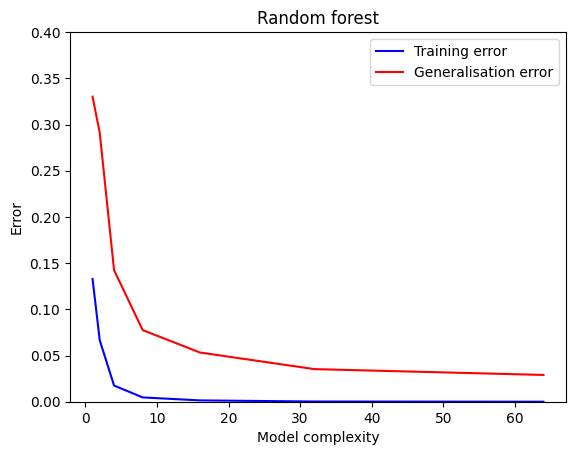

In [10]:
from sklearn.ensemble import RandomForestClassifier

complexities = []
train_errors = []
test_errors = []
for n_estimators in [1,2,4,8,16,32,64]:
    clf = RandomForestClassifier(n_estimators=n_estimators, max_depth=8)
    sample_size = len(y_train)
    train_error, test_error = bootstrap_error(clf, X_train, y_train, X_dev, y_dev, sample_size)
    complexities.append(n_estimators)
    train_errors.append(train_error)
    test_errors.append(test_error)
plt.plot(complexities, train_errors, c='b', label='Training error')
plt.plot(complexities, test_errors, c='r', label='Generalisation error')
plt.ylim(0,0.4)
plt.ylabel('Error')
plt.xlabel('Model complexity')
plt.title('Random forest')
plt.legend()
plt.show()

### Plot error vs number of training samples

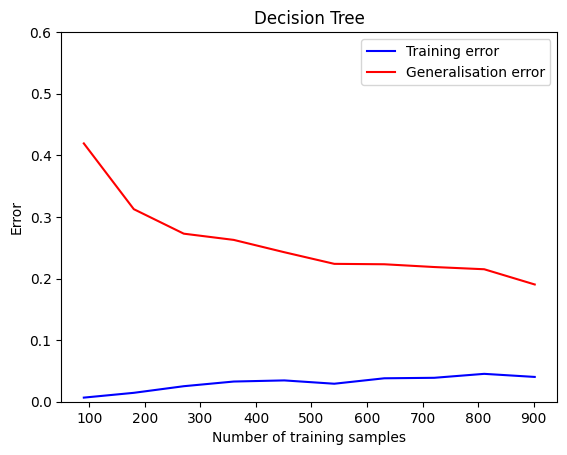

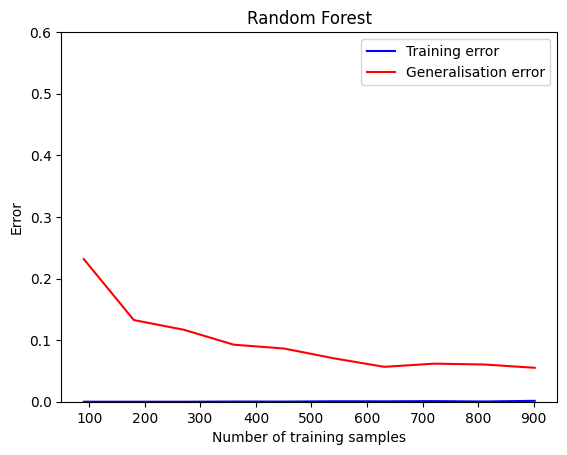

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
import random

def plot_error_curves(clf, X_train, y_train, X_test, y_test, num_train_sets=NUM_TRAIN_SETS, title=None):
    data_sizes = []
    train_errors = []
    test_errors = []
    for i in range(num_train_sets):
        sample_size = int(len(y_train) * (i+1)/num_train_sets)
        train_error, test_error = bootstrap_error(clf, X_train, y_train, X_test, y_test, sample_size)
        data_sizes.append(sample_size)
        train_errors.append(train_error)
        test_errors.append(test_error)
    plt.plot(data_sizes, train_errors, c='b', label='Training error')
    plt.plot(data_sizes, test_errors, c='r', label='Generalisation error')
    plt.ylim(0,0.6)
    plt.ylabel('Error')
    plt.xlabel('Number of training samples')
    if title:
        plt.title(title)
    plt.legend()
    plt.show()

# Note that we're passing dev data for estimating generalisation error here, not test data
dt = DecisionTreeClassifier(max_depth=8)
plot_error_curves(dt, X_train, y_train, X_dev, y_dev, title='Decision Tree')
rf = RandomForestClassifier(max_depth=8, n_estimators=16)
plot_error_curves(rf, X_train, y_train, X_dev, y_dev, title='Random Forest')

### TODO Comparing fit and data needed

- Which classifier would you use?
- Would it be useful to collect more training data?
- The decision tree has a larger spread between training and generalisation error. Why is this?
- Note we haven't yet used test data. When is it OK to use the held-out test data from our train/dev/test split?

- RF. 
  Because random forest is more accurate and leads to lower generalisation error. The Generalisation error of random forest is less than Decision tree.

- Yes. 
  Overfitting happens when we try to fit a complex model with an inadequate amount of training data. Having more training data helps

- Random Forests, simply average trees over the iterations, reducing the model's variance. 

- When the final model(hyperparameter) is selected, 
  - retrain the model on the entire (75%）of training set (train + val), 
  - test data is then used to compare model

# End of Tutorial. Many Thanks.